In [2]:
import sys
# adding notebooks to the system path
sys.path.insert(0, '/home/southark/notebooks')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
from tqdm import tqdm

matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

from perturbseq import *

In [3]:
gwps_mean_pop = CellPopulation.from_hdf('/data/norman/southark/tfs_standardized/20240311_fibroblast_CRISPRa_mean_pop.hdf', stored_matrix_ids=['p', 'adj_p', 'masked'])
gwps_mean_pop.genes.index.name = 'gene_id'

Loading matrix...
Available keys: ['/cell_list', '/gene_list', '/matrix', '/normalized_matrix_adj_p', '/normalized_matrix_masked', '/normalized_matrix_p']
Loading metadata...
Done in 6.3875226974487305s.
Done.


In [4]:
expanded_guides = pd.read_csv('/data/norman/southark/tfs_standardized/20240319_rescued_fibroblast_guides.csv', index_col=0)
gwps_mean_pop.cells['expanded_masked_active'] = expanded_guides['expanded_masked_active']

In [5]:
guide_library = pd.read_csv('/data/norman/southark/tfs_standardized/20240318_merged_morf_tf_lib_guide_activity_classifications_final_low_UMI_count_regressions_coef.csv', index_col=0)

In [6]:
guide_library['masked_active'] = gwps_mean_pop.cells['masked_active']
guide_library['expanded_masked_active'] = gwps_mean_pop.cells['expanded_masked_active']
guide_library['masked_active'].fillna(False, inplace=True)
guide_library['expanded_masked_active'].fillna(False, inplace=True)
guide_library['de_genes'] = gwps_mean_pop.cells['de_genes']

guide_library['masked_active_rpe1'].fillna(False, inplace=True)
guide_library['masked_active_fibro'].fillna(False, inplace=True)

guide_library['de_genes'] = gwps_mean_pop.cells['de_genes']
guide_library['log_de_gene'] = np.log10(guide_library['de_genes']+1)

guide_library['guide_label'] = guide_library.sort_values(['de_genes', 'target_pctl_fibro'], ascending=False).groupby('target_gene').de_genes.rank(method = 'first', ascending=False, na_option = 'bottom').astype('int')
guide_library['guide_label'] = guide_library['target_gene']+ '_g' + guide_library['guide_label'].astype('str')
guide_library

/tmp/ipykernel_86042/607880326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guide_library['masked_active'].fillna(False, inplace=True)
/tmp/ipykernel_86042/607880326.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  guide_library['masked_active'].fillna(False, inplace=True)
/tmp/ipykernel_86042/6078803

,gene_name,target_gene,ctrl_pctl_fibro,target_pctl_fibro,pctl_change_fibro,pctl_fc_fibro,pctl_log2fc_fibro,adj_p_fibro,ctrl_coef_fibro,ctrl_abs_fibro,...,good_guide_rpe1,best_guide_fibro,best_guide_rpe1,seed_driven_fibro,seed_driven_rpe1,masked_active,expanded_masked_active,de_genes,log_de_gene,guide_label
guide_identity,,,,,,,,,,,,,,,,,,,,,
AATF_GCGCAGAAGGTTGAAGGGAT,ENSG00000275700,AATF,40.9010,56.8994,15.9984,1.3912,0.4763,0.0000,0.1472,0.1472,...,True,False,False,False,True,False,False,12.0000,1.1139,AATF_g1
AATF_GCGTGCGAGTGCGCGGGAAG,ENSG00000275700,AATF,40.9010,53.7064,12.8054,1.3131,0.3930,0.0055,0.1472,0.1472,...,False,False,False,False,False,False,False,10.0000,1.0414,AATF_g3
AATF_GGAAGCGCGCAGAAGGTTGA,ENSG00000275700,AATF,40.9010,62.5715,21.6705,1.5298,0.6134,0.0000,0.1472,0.1472,...,True,True,True,False,False,False,False,0.0000,0.0000,AATF_g5
AATF_GGAAGGGATTGGAGCCGTAT,ENSG00000275700,AATF,40.9010,55.5810,14.6800,1.3589,0.4425,0.0000,0.1472,0.1472,...,True,False,False,False,False,False,False,1.0000,0.3010,AATF_g4
AATF_GGGCGTTGCTAGCATGAAGG,ENSG00000275700,AATF,40.9010,57.9321,17.0311,1.4164,0.5022,0.0000,0.1472,0.1472,...,False,False,False,True,False,False,False,11.0000,1.0792,AATF_g2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC_GCGAGCCGGACTCTACGCCG,ENSG00000070476,ZXDC,29.1620,42.1480,12.9860,1.4453,0.5314,0.0000,0.0352,0.0352,...,False,False,False,False,False,False,False,3.0000,0.6021,ZXDC_g2
ZXDC_GGCTGGGCTGACGTGACGTG,ENSG00000070476,ZXDC,29.1620,12.2125,-16.9495,0.4188,-1.2557,1.0000,0.0352,0.0352,...,False,False,False,False,False,False,False,6.0000,0.8451,ZXDC_g1
ZXDC_GGGAGCGCCGGCACCTACGA,ENSG00000070476,ZXDC,29.1620,36.0376,6.8756,1.2358,0.3054,1.0000,0.0352,0.0352,...,True,False,True,False,False,False,False,0.0000,0.0000,ZXDC_g6


In [7]:
#various guide selections

In [8]:
masked_and_strongest = guide_library.query('masked_active and not bad_seed').sort_values('de_genes', ascending=False).groupby('target_gene').head(1).index

In [9]:
expanded_masked = guide_library.query('expanded_masked_active and not bad_seed').index

In [10]:
gwps_mean_pop.cells['primary_guide'] = gwps_mean_pop.cells.index.isin(masked_and_strongest)
gwps_mean_pop.cells['expanded_primary_guide'] = gwps_mean_pop.cells.index.isin(np.union1d(masked_and_strongest, expanded_masked))

In [11]:
comps = pd.read_csv('/data/norman/southark/tfs_standardized/20240331_fibroblast_bulk_comps.csv', index_col=0)
target_genes = comps.loc[:, (comps>0).any()].columns
target_gene_ids = gwps_mean_pop.genes.query('gene_name in @target_genes').index

In [12]:
gwps_expr = gwps_mean_pop.where(cells='masked_active or expanded_masked_active',
                                genes=target_gene_ids)
gwps_expr['gene_id'] = guide_library.reindex(gwps_expr.index)['gene_name']
gwps_expr.set_index('gene_id', append=True, inplace=True)


In [13]:
def get_masked_expr(expr):
    masked_expr = expr.copy()
    target_genes = masked_expr.index.get_level_values(1).to_series()
    target_genes[~target_genes.isin(masked_expr.columns)] = 'NE'
    masked_expr = masked_expr.set_index([target_genes, masked_expr.index.get_level_values(0)])
    for name in tqdm(masked_expr.index.get_level_values(0).unique()):
        if name != "NE":
            masked_expr.loc[name, name] = np.nan
    masked_expr = masked_expr.droplevel(0)
    return masked_expr

In [14]:
masked_gwps_expr = get_masked_expr(gwps_expr)
masked_gwps_variable_expr = get_masked_expr(gwps_expr[target_gene_ids])

100%|█████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 4678.62it/s]


# Expression programs

In [15]:
# this could be used to show the processing

In [16]:
codes = pd.read_csv('/data/norman/southark/tfs_standardized/20240331_fibroblast_bulk_codes.csv', index_col=0)
codes.columns = codes.columns.astype(int)

total_codes = pd.read_csv('/data/norman/southark/tfs_standardized/20240331_total_fibroblast_bulk_codes.csv', index_col=0)
total_codes.columns = total_codes.columns.astype(int)

# Gene expression programs

In [17]:
primary_guides = gwps_mean_pop.cells.query('primary_guide').index

In [18]:
expanded_primary = gwps_mean_pop.cells.query('primary_guide or expanded_primary_guide').index

In [19]:
all_clustered = gwps_mean_pop.cells.query('masked_active or expanded_masked_active').index

In [21]:
#all clustered + masked active from RPE1
good_guides = guide_library.query('(masked_active_fibro or expanded_masked_active or masked_active_rpe1)').index

In [23]:
gene_codes = total_codes.reindex(good_guides).dropna()
gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
gene_codes = gene_codes.set_index('gene', append=True).swaplevel()

# Program Markers

In [24]:
prog_markers100 = pd.read_csv('/data/norman/southark/gene_sets/fibroblast_lit_sets/human_cross_dataset_merge100.csv')
prog_markers20 = pd.read_csv('/data/norman/southark/gene_sets/fibroblast_lit_sets/human_cross_dataset_merge20.csv')

fibro_markers_rudensky =['CD34', 'MFAP5', 'PI16', 'DKK3', 'DCN', 'VCAN', 'ASPN', 
               'THY1', 'CXCL1', 'MMP3', 'HLA-DRA', 'CD74', 'SPARC', 'NOTCH3', 'MFAP4',
               'POSTN', 'SFRP1', 'COL3A1', 'CDH11', 'CCL2', 'IL6', 'KAZN', 'CXCL12',
              'APOE', 'RSPO3','LRP1B', 'SLIT2', 'CFD','HBEGF',
              'PRG4', 'CD55', 'CRTAC1', 'FN1', 'ACTA2']


state_markers = set(fibro_markers_rudensky)|set(prog_markers20.gene.tolist())

state_markers100 = set(fibro_markers_rudensky)|set(prog_markers100.gene.tolist())

# Grouping by 'program' and 'dataset', and then aggregating 'gene' into lists
grouped = prog_markers100.groupby(['program', 'dataset'])['gene'].agg(list)

# Creating a dictionary with keys as 'program-dataset' and values as lists of genes
markers_dict = {f'{idx[0]}-{idx[1]}': values for idx, values in grouped.items()}
markers_dict['Smith_2023'] = fibro_markers_rudensky

In [25]:
markers_universal = {k: markers_dict[k] for k in ['universal-Buechler_2021', 'universal-Korsunsky_2022']}

markers_inflamatory = {k: markers_dict[k] for k in ['inflammatory-Buechler_2021', 'inflammatory-Korsunsky_2022']}

# Figures for each program
export guide level, gene level, and program reduced for each program


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.colors import TwoSlopeNorm, Normalize
from matplotlib.colors import to_hex

def generate_expression_program_visualization(
    expression_program_name,
    guide_subset,
    high_threshold_quantile=0.985,
    low_threshold_quantile=0.015,
    histogram_figsize=(5, 2),
    heatmap_figsize=(12, 8),
    markers=None,
    comps=None,
    total_codes=None,
    gwps_mean_pop=None,
    guide_library=None,
    output_dir=None
):
    # Step 1: Find the genes involved in the program
    program_genes = comps.loc[expression_program_name]
    program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(15).index.tolist()

    # Step 2: Find the outlier columns for that expression program
    feature_values = total_codes.loc[guide_subset, expression_program_name]
    outlier_threshold_high = feature_values.quantile(high_threshold_quantile)
    outlier_threshold_low = feature_values.quantile(low_threshold_quantile)
    outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
    outlier_perturbations = total_codes.loc[outlier_perturbations].sort_values(expression_program_name).index
    # Generate histogram
    generate_histogram(feature_values, outlier_threshold_high, outlier_threshold_low, histogram_figsize, output_dir, expression_program_name)

    # Step 3: Extract gene expression data
    expr = gwps_mean_pop.where(cells=outlier_perturbations, genes=program_gene_names)

    # Step 4-8: Process and reorder data
    reordered_expr = process_and_reorder_data(expr, feature_values, guide_library, outlier_perturbations)

    # Generate heatmap
    generate_heatmap(reordered_expr, program_gene_names, gwps_mean_pop, markers, heatmap_figsize, output_dir, expression_program_name)

def generate_histogram(feature_values, outlier_threshold_high, outlier_threshold_low, figsize, output_dir, expression_program_name):
    count, bins = np.histogram(feature_values, bins=30)
    vmin, vmax = bins.min(), bins.max()
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    colormap = plt.cm.RdBu_r

    fig = plt.figure(figsize=figsize, facecolor='white')
    gs = gridspec.GridSpec(2, 2, width_ratios=[10, 0.1], height_ratios=[5, 1], hspace=0.1, wspace=0.02)

    # Histogram subplot
    ax0 = fig.add_subplot(gs[0, 0])
    for (low, high), c in zip(zip(bins, bins[1:]), count):
        color = colormap(norm((low + high) / 2))
        ax0.bar(low, c, width=(high - low), color=color, align='edge')

    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.set_ylabel('Frequency')
    ax0.set_title(f'Histogram of Feature Values for Program {expression_program_name}')

    # Add threshold lines
    ax0.axvline(x=outlier_threshold_high, color='r', linestyle='--')
    ax0.text(outlier_threshold_high, ax0.get_ylim()[1]*0.9, f'High: {outlier_threshold_high:.2f}',
             color='r', ha='left', va='top')
    ax0.axvline(x=outlier_threshold_low, color='b', linestyle='--')
    ax0.text(outlier_threshold_low, ax0.get_ylim()[1]*0.9, f'Low: {outlier_threshold_low:.2f}',
             color='b', ha='right', va='top')

    # Rug plot subplot
    ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)
    for value in feature_values:
        ax1.plot([value, value], [0, 1], color=colormap(norm(value)), linewidth=2)
    ax1.axis('on')
    ax1.margins(y=0.5)
    ax1.yaxis.set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('none')
    ax1.xaxis.set_ticks_position('none')

    # Colorbar
    ax2 = fig.add_subplot(gs[:, 1])
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=norm), cax=ax2)
    cbar.set_label('Bin Midpoint Value', rotation=270, labelpad=15)

    plt.subplots_adjust(hspace=0)
    
    if output_dir:
        plt.savefig(f'{output_dir}/histogram_program_{expression_program_name}.pdf')
    plt.show()

def process_and_reorder_data(expr, feature_values, guide_library, outlier_perturbations):
    clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False)
    reordered_column_indices = clustered.dendrogram_col.reordered_ind
    reordered_expr = expr.iloc[:, reordered_column_indices]
    reordered_expr['feature_values'] = feature_values.div(feature_values.std())
    reordered_expr['guide_label'] = guide_library.loc[outlier_perturbations, 'guide_label']
    return reordered_expr.set_index('guide_label').T

def generate_heatmap(transposed_expr, program_gene_names, gwps_mean_pop, markers, figsize, output_dir, expression_program_name):
    avg_expr = gwps_mean_pop.genes.query("gene_name in @program_gene_names").set_index('gene_name')['mean']
    log2_avg_expr = np.log2(avg_expr + 1)
    
    norm = Normalize(vmin=log2_avg_expr.min(), vmax=log2_avg_expr.max())
    cmap = sns.color_palette("Reds", as_cmap=True)
    expr_colors = pd.Series([to_hex(cmap(norm(value))) for value in log2_avg_expr], index=log2_avg_expr.index)
    
    group_colors = {
        'inflammatory-Buechler_2021': '#864D9E',
        'inflammatory-Korsunsky_2022': '#AE5981',
        'universal-Buechler_2021': '#376ADC',
        'universal-Korsunsky_2022': '#528FF0',
        'Smith_2023': '#D99828'
    }
    
    combined_group_colors = pd.DataFrame(index=transposed_expr.index)
    for group_name, genes in markers.items():
        combined_group_colors[group_name] = [group_colors[group_name] if gene in genes else 'white' for gene in combined_group_colors.index]
    combined_group_colors['Expression Color'] = expr_colors.reindex(combined_group_colors.index)
    
    clustered_transposed = sns.clustermap(transposed_expr, cmap='RdBu_r', center=0, 
                                          robust=True,
                                          row_colors=combined_group_colors,
                                          row_cluster=False,
                                          col_cluster=False, figsize=figsize,
                                          cbar_kws={'label': 'Expression Level'})
    
    plt.suptitle(f'Heatmap for Expression Program {expression_program_name}', y=1.02)
    
    if output_dir:
        plt.savefig(f'{output_dir}/heatmap_program_{expression_program_name}.pdf', bbox_inches='tight')
    plt.show()

In [28]:
def generate_collapsed_gene_visualization(
    expression_program_name,
    all_clustered,
    comps,
    gwps_mean_pop,
    total_codes,
    markers,
    high_threshold_quantile=0.95,
    low_threshold_quantile=0.05,
    histogram_figsize=(5, 2),
    heatmap_figsize=(12, 8),
    output_dir=None,
    is_gene_level=False,
    n_program_genes=15,
    vertical_heatmap=False,
    vmin=None,
    vmax=None
):
    # Step 1: Find the genes involved in the program
    program_genes = comps.loc[expression_program_name]
    program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(n_program_genes).index.tolist()

    # Step 2: Find the outlier columns for that expression program
    if not is_gene_level:
        # Reduce total_codes to gene level if it's not already
        gene_codes = total_codes.loc[all_clustered]
        gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
        gene_codes = gene_codes.groupby('gene').mean()
        print(gene_codes.loc['KLF4'])
    else:
        gene_codes = total_codes

    feature_values = gene_codes[expression_program_name]
    outlier_threshold_high = feature_values.quantile(high_threshold_quantile)
    outlier_threshold_low = feature_values.quantile(low_threshold_quantile)
    outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
    outlier_perturbations = gene_codes.loc[outlier_perturbations].sort_values(expression_program_name).index

    # Generate histogram
    generate_collapsed_histogram(feature_values, outlier_threshold_high, outlier_threshold_low, histogram_figsize, output_dir, expression_program_name)

    # Step 3: Extract gene expression data
    # Filter gwps_mean_pop based on all_clustered before collapsing to gene level
    gene_expr = gwps_mean_pop.where(cells=all_clustered, genes='mean > 0.1', gene_names=True).copy()
    gene_expr['gene'] = gene_expr.index.map(lambda x: x.split('_')[0])
    gene_expr = gene_expr.groupby('gene').mean()

    expr = gene_expr.loc[outlier_perturbations, program_gene_names]

    # Step 4-6: Cluster and reorder data
    clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False, figsize=(4, 3))
    reordered_column_indices = clustered.dendrogram_col.reordered_ind
    reordered_expr = expr.iloc[:, reordered_column_indices]

    # Step 8: Add the mapped feature_values
    reordered_expr['feature_values'] = feature_values.loc[outlier_perturbations]

    # Generate final heatmap
    generate_collapsed_heatmap(reordered_expr, program_gene_names, gwps_mean_pop, markers, heatmap_figsize, output_dir, expression_program_name, vertical_heatmap, vmin, vmax)

def generate_collapsed_heatmap(reordered_expr, program_gene_names, gwps_mean_pop, markers, figsize, output_dir, expression_program_name, vertical_heatmap, vmin, vmax):
    avg_expr = gwps_mean_pop.genes.query("gene_name in @program_gene_names").set_index('gene_name')['mean']
    log2_avg_expr = np.log2(avg_expr + 1)
    
    norm = Normalize(vmin=log2_avg_expr.min(), vmax=log2_avg_expr.max())
    cmap = sns.color_palette("Reds", as_cmap=True)
    expr_colors = pd.Series([to_hex(cmap(norm(value))) for value in log2_avg_expr], index=log2_avg_expr.index)
    
    group_colors = {
        'inflammatory-Buechler_2021': '#864D9E',
        'inflammatory-Korsunsky_2022': '#AE5981',
        'universal-Buechler_2021': '#376ADC',
        'universal-Korsunsky_2022': '#528FF0',
        'Smith_2023': '#D99828'
    }
    
    # Create marker colors for genes
    gene_colors = pd.DataFrame(index=program_gene_names)
    for group_name, genes in markers.items():
        gene_colors[group_name] = [group_colors[group_name] if gene in genes else 'white' for gene in gene_colors.index]
    gene_colors['Expression Color'] = expr_colors.reindex(gene_colors.index)
    
    if vertical_heatmap:
        reordered_expr = reordered_expr.T
        row_colors = gene_colors
        col_colors = None
    else:
        row_colors = None
        col_colors = gene_colors
    
    clustered_map = sns.clustermap(reordered_expr, cmap='RdBu_r', center=0, 
                                   robust=True,
                                   row_colors=row_colors,
                                   col_colors=col_colors,
                                   row_cluster=False,
                                   col_cluster=False, figsize=figsize,
                                   cbar_kws={'label': 'Expression Level'},
                                   vmin=vmin, vmax=vmax)
    
    plt.suptitle(f'Heatmap for Expression Program {expression_program_name} (Collapsed)', y=1.02)
    
    if output_dir:
        plt.savefig(f'{output_dir}/heatmap_program_{expression_program_name}_collapsed.pdf', bbox_inches='tight')
    plt.show()
# The generate_collapsed_histogram function remains the same

def generate_collapsed_histogram(feature_values, outlier_threshold_high, outlier_threshold_low, figsize, output_dir, expression_program_name):
    count, bins = np.histogram(feature_values, bins=30)
    vmin, vmax = bins.min(), bins.max()
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    #norm = plt.Normalize(vmin=vmin, vmax=vmax)
    colormap = plt.cm.RdBu_r

    fig = plt.figure(figsize=figsize, facecolor='white')
    gs = plt.GridSpec(2, 2, width_ratios=[10, 0.1], height_ratios=[5, 1], hspace=0.1, wspace=0.02)

    # Histogram subplot
    ax0 = fig.add_subplot(gs[0, 0])
    for (low, high), c in zip(zip(bins, bins[1:]), count):
        color = colormap(norm((low + high) / 2))
        ax0.bar(low, c, width=(high - low), color=color, align='edge')

    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.set_ylabel('Frequency')
    ax0.set_title(f'Histogram of Feature Values for Program {expression_program_name} (Collapsed)')

    # Add threshold lines
    ax0.axvline(x=outlier_threshold_high, color='r', linestyle='--')
    ax0.text(outlier_threshold_high, ax0.get_ylim()[1]*0.9, f'High: {outlier_threshold_high:.2f}',
             color='r', ha='left', va='top')
    ax0.axvline(x=outlier_threshold_low, color='b', linestyle='--')
    ax0.text(outlier_threshold_low, ax0.get_ylim()[1]*0.9, f'Low: {outlier_threshold_low:.2f}',
             color='b', ha='right', va='top')

    # Rug plot subplot
    ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)
    for value in feature_values:
        ax1.plot([value, value], [0, 1], color=colormap(norm(value)), linewidth=2)
    ax1.axis('on')
    ax1.margins(y=0.5)
    ax1.yaxis.set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('none')
    ax1.xaxis.set_ticks_position('none')

    # Colorbar
    ax2 = fig.add_subplot(gs[:, 1])
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=norm), cax=ax2)
    cbar.set_label('Bin Midpoint Value', rotation=270, labelpad=15)

    plt.subplots_adjust(hspace=0)
    
    if output_dir:
        plt.savefig(f'{output_dir}/histogram_program_{expression_program_name}_collapsed.pdf')
    plt.show()    

# The generate_collapsed_histogram function remains the same

## Universal

### Program 31: Universal

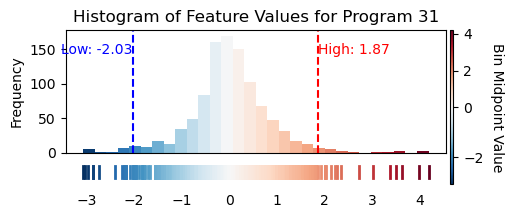

/tmp/ipykernel_86042/1707786352.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())
/tmp/ipykernel_86042/1707786352.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['guide_label'] = guide_library.loc[outlier_perturbations, 'guide_label']


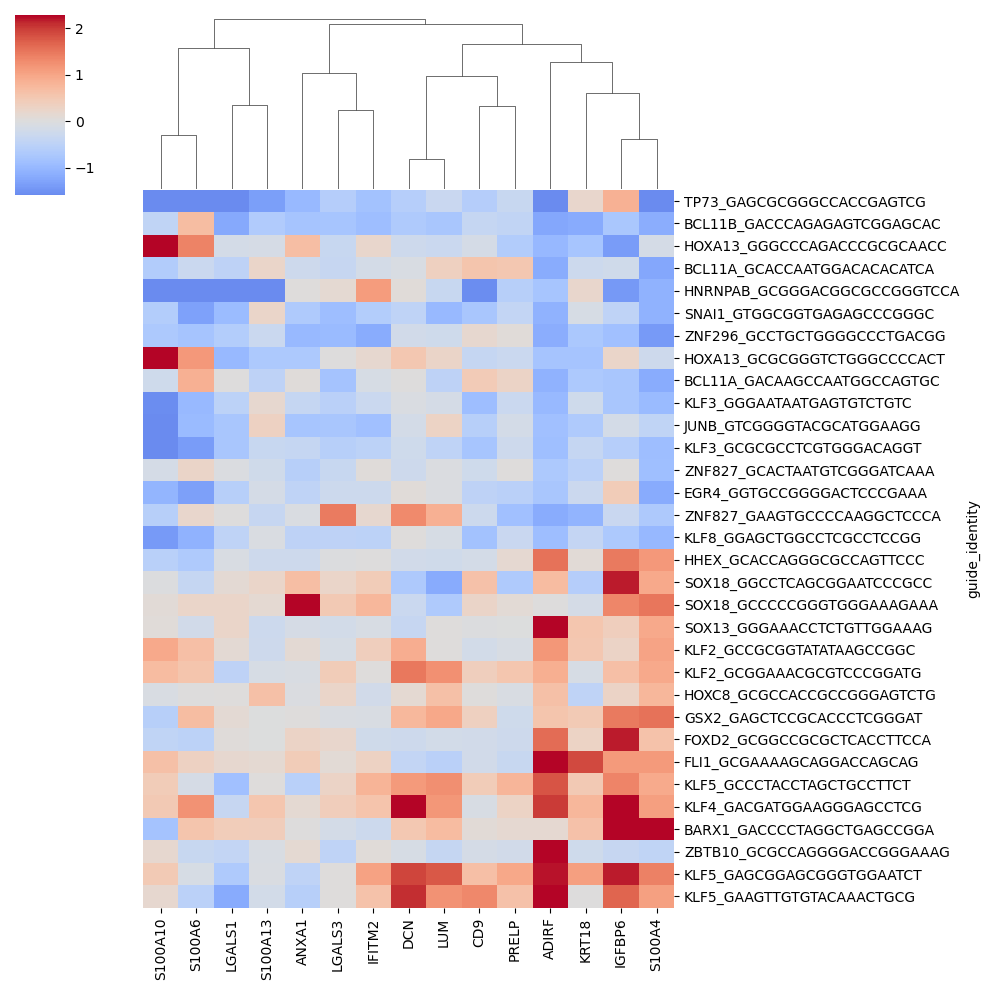

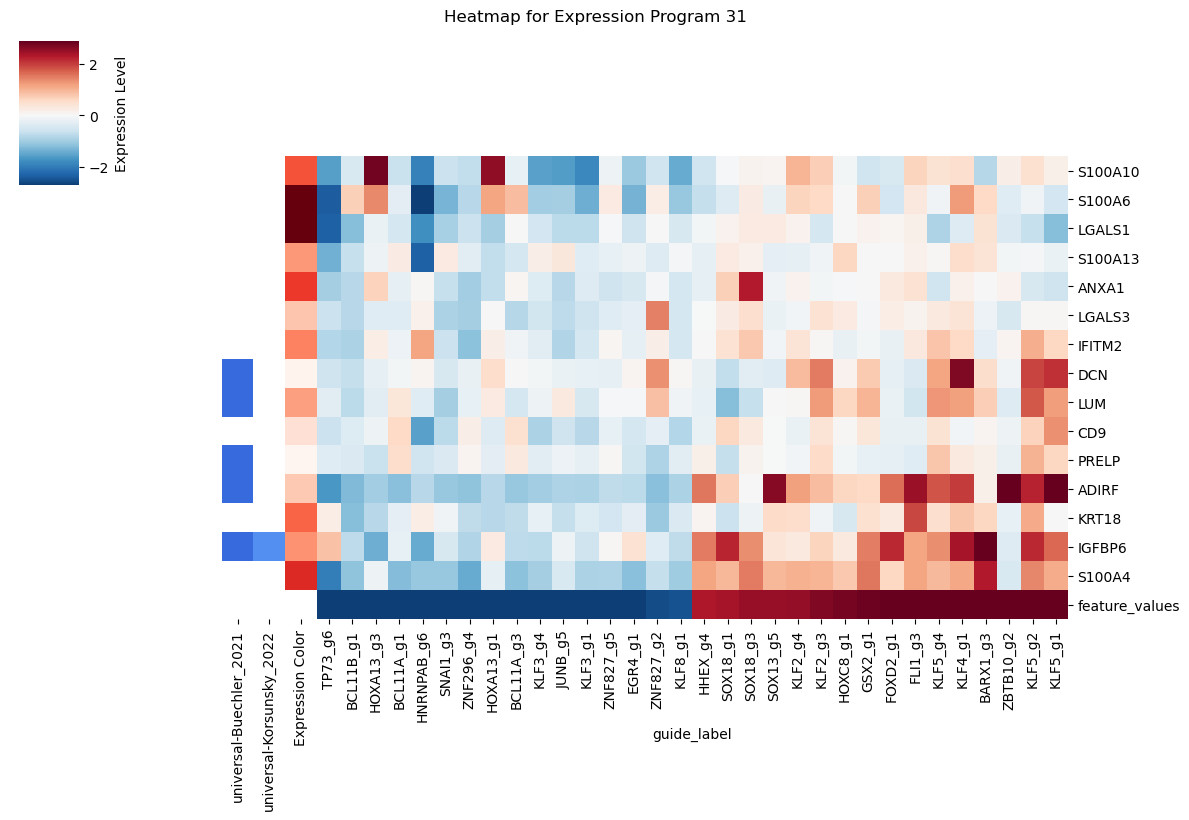

In [30]:
generate_expression_program_visualization(
    expression_program_name=31,
    guide_subset=good_guides,
    high_threshold_quantile=0.985,
    low_threshold_quantile=0.015,
    histogram_figsize=(5, 2),
    heatmap_figsize=(12, 8),
    markers=markers_universal,
    comps=comps,
    total_codes=total_codes,
    gwps_mean_pop=gwps_mean_pop,
    guide_library=guide_library,
    output_dir='/data/norman/southark/tfs_standardized/figure_exports/'
)

### Program 32: Inflammatory SPARC/COL3A1

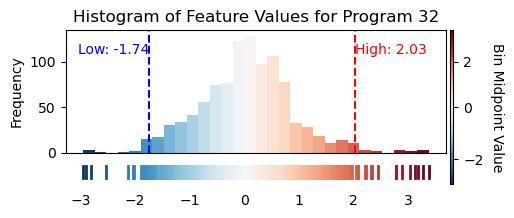

/tmp/ipykernel_86042/1707786352.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())
/tmp/ipykernel_86042/1707786352.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['guide_label'] = guide_library.loc[outlier_perturbations, 'guide_label']


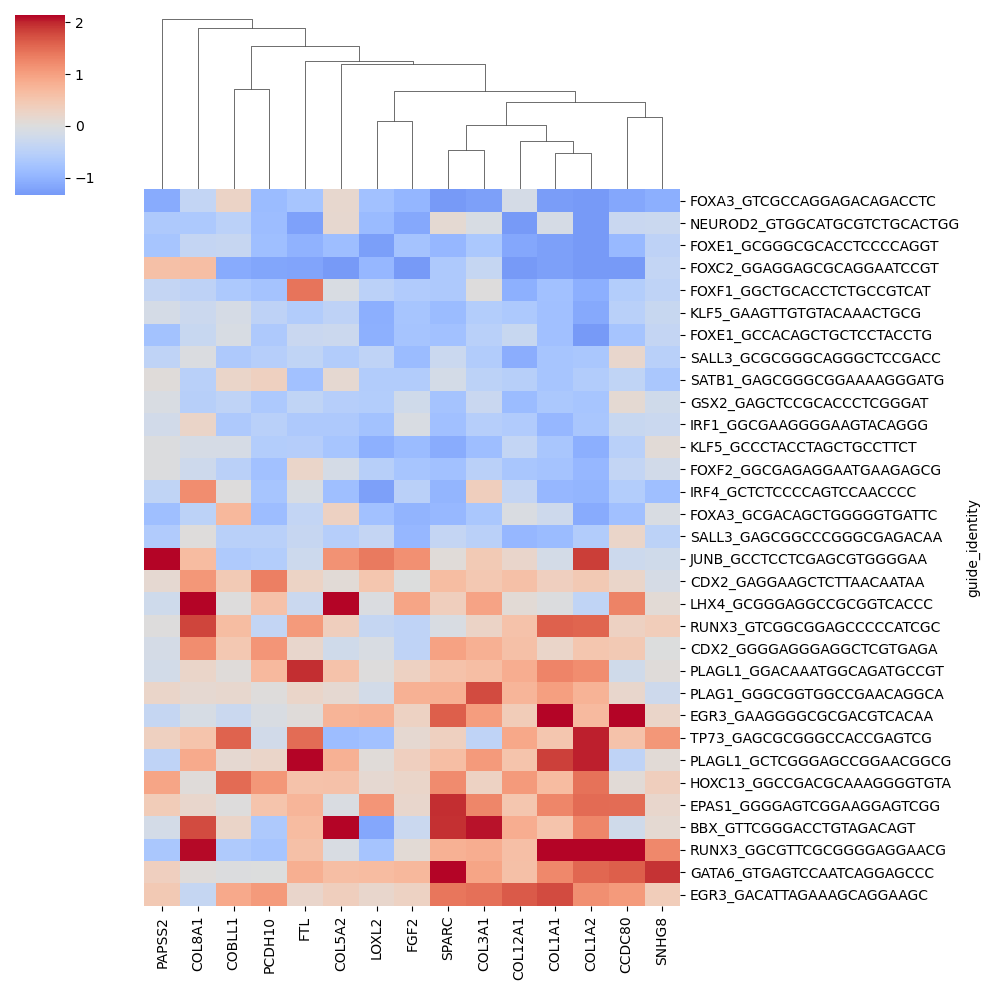

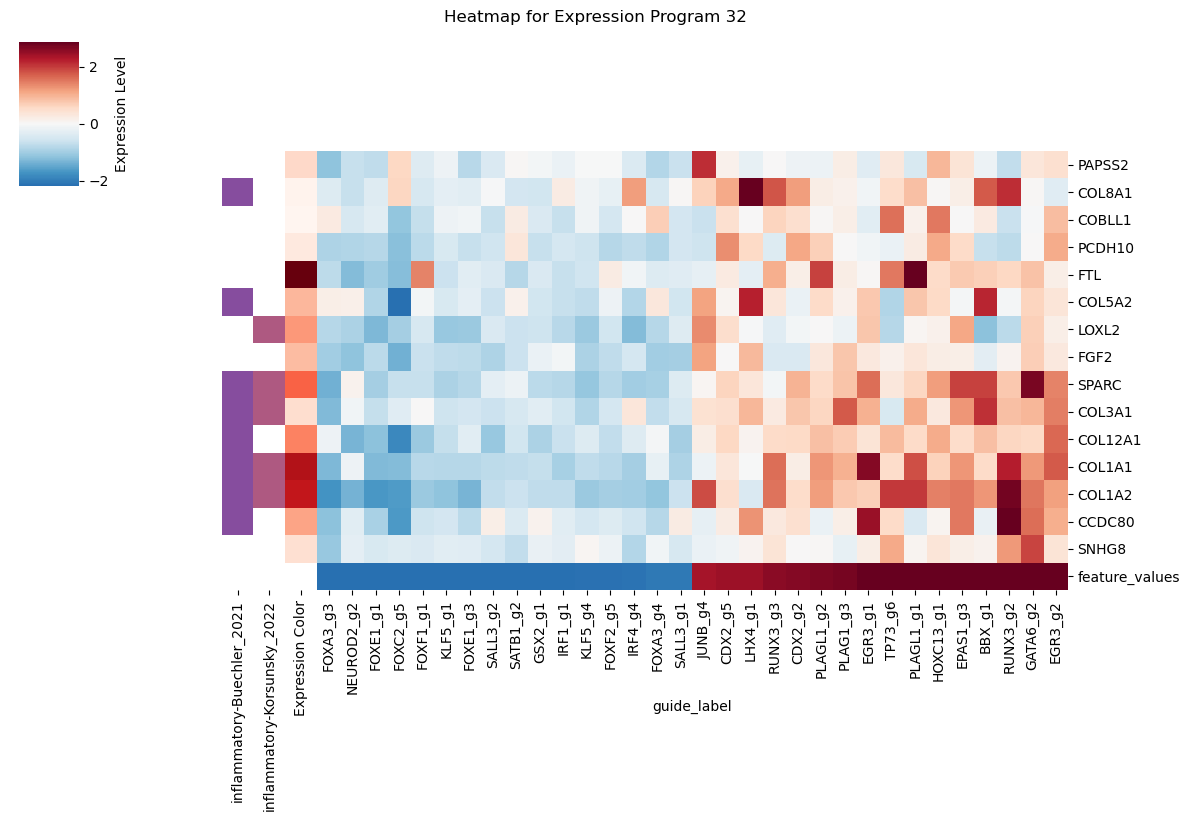

In [32]:
generate_expression_program_visualization(
    expression_program_name=32,
    guide_subset=good_guides,
    high_threshold_quantile=0.985,
    low_threshold_quantile=0.015,
    histogram_figsize=(5, 2),
    heatmap_figsize=(12, 8),
    markers=markers_inflamatory,
    comps=comps,
    total_codes=total_codes,
    gwps_mean_pop=gwps_mean_pop,
    guide_library=guide_library,
    output_dir='/data/norman/southark/tfs_standardized/figure_exports/'
)

### Program 4: Myofibroblast

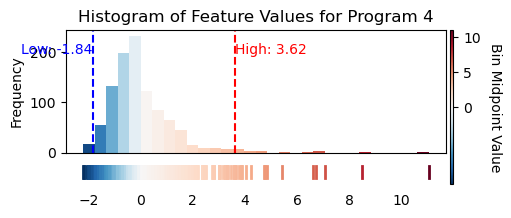

/tmp/ipykernel_86042/1707786352.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())
/tmp/ipykernel_86042/1707786352.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['guide_label'] = guide_library.loc[outlier_perturbations, 'guide_label']


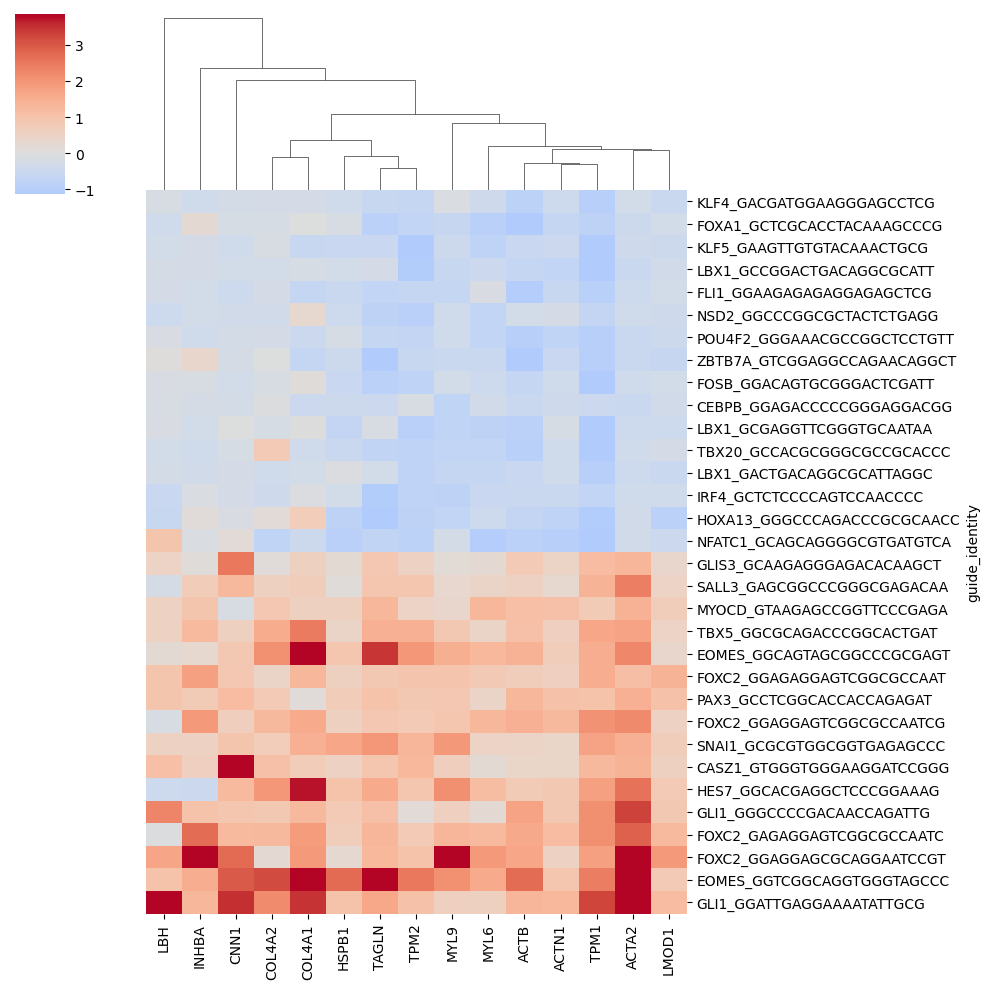

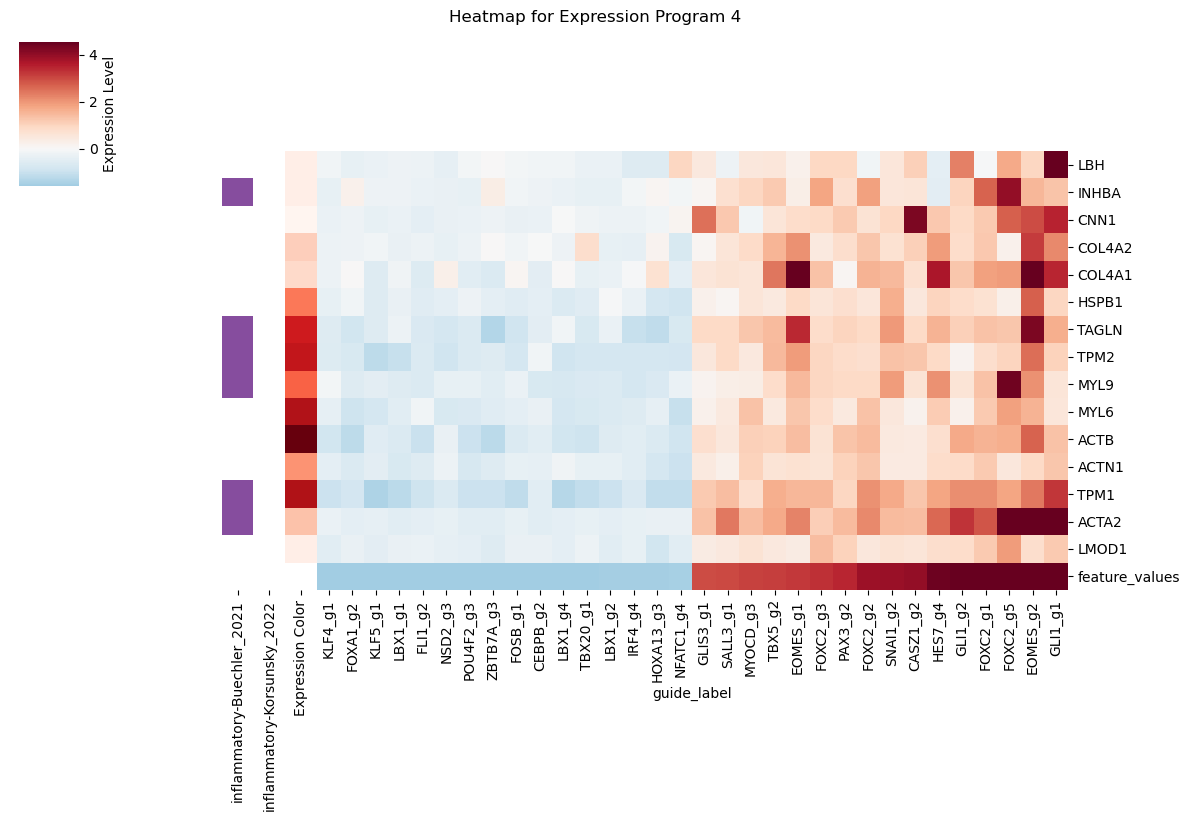

In [33]:
generate_expression_program_visualization(
    expression_program_name=4,
    guide_subset=good_guides,
    high_threshold_quantile=0.985,
    low_threshold_quantile=0.015,
    histogram_figsize=(5, 2),
    heatmap_figsize=(12, 8),
    markers=markers_inflamatory,
    comps=comps,
    total_codes=total_codes,
    gwps_mean_pop=gwps_mean_pop,
    guide_library=guide_library,
    output_dir='/data/norman/southark/tfs_standardized/figure_exports/'
)

## MYC

/tmp/ipykernel_86042/767298207.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_values)
/tmp/ipykernel_86042/767298207.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())


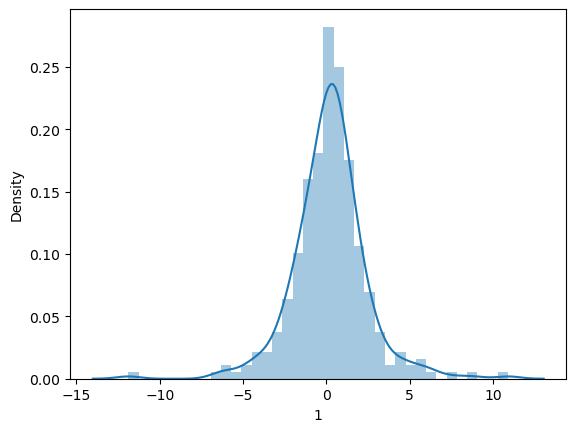

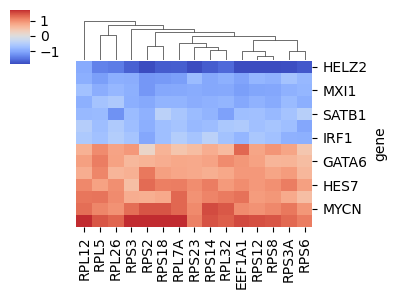

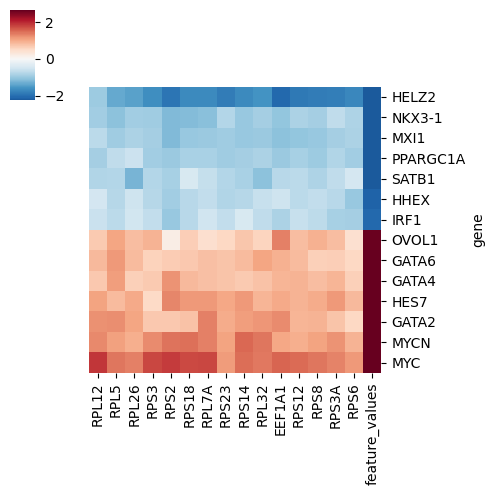

In [35]:
#averaged program scores

gene_expr =gwps_mean_pop.where(cells='masked_active or expanded_masked_active', genes='mean > 0.1', gene_names=True).copy()
gene_expr['gene'] = gene_expr.index.map(lambda x: x.split('_')[0])
gene_expr = gene_expr.groupby('gene').mean()

gene_codes = total_codes.loc[all_clustered]
gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
gene_codes = gene_codes.groupby('gene').mean()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'expression_program_name' is the name of the feature you are interested in
expression_program_name = 1  # Replace with the actual program name
guide_subset = all_clustered
collapse_to_gene = False

# Step 1: Find the genes involved in the program
program_genes = comps.loc[expression_program_name]
program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(15).index.tolist()

# Step 2: Find the outlier columns for that expression program
feature_values = gene_codes[expression_program_name]
outlier_threshold_high = feature_values.quantile(0.98)  # Adjust these thresholds as needed
outlier_threshold_low = feature_values.quantile(0.02)
outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
outlier_perturbations = gene_codes.loc[outlier_perturbations].sort_values(expression_program_name).index

sns.distplot(feature_values)

# Step 3: Extract gene expression data
# Replace 'gwps_mean_pop.where' with the actual method to extract the data from your dataset
expr = gene_expr.loc[outlier_perturbations, program_gene_names]

# Step 4: Produce a clustermap of the gene expression data (without feature_values)
clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False, figsize=[4,3])  # You can adjust the parameters as needed

# Step 5: Get the order of columns after clustering
reordered_column_indices = clustered.dendrogram_col.reordered_ind

# Step 6: Reorder expr dataframe according to the clustering
reordered_expr = expr.iloc[:, reordered_column_indices]

# Step 8: Add the mapped feature_values as the last column in the reordered expr dataframe
reordered_expr['feature_values'] = feature_values.div(feature_values.std())
if collapse_to_gene:
    reordered_expr.index = expr.index.map(lambda x: x.split('_')[0])

# reordered_expr now has the additional column 'feature_values' at the far right, maintaining the clustering order
clustered = sns.clustermap(reordered_expr, cmap='RdBu_r', center=0, robust=True, 
                           row_cluster=False, col_cluster=False, figsize=[5,5])  # You can adjust the parameters as needed



#plt.savefig('/data/norman/southark/tfs_standardized/figure_exports/20240412_fig4_myc_score_heatmap.pdf')

 # Antigen presentation (IRF1)

/tmp/ipykernel_86042/3545734200.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_values)
/tmp/ipykernel_86042/3545734200.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())


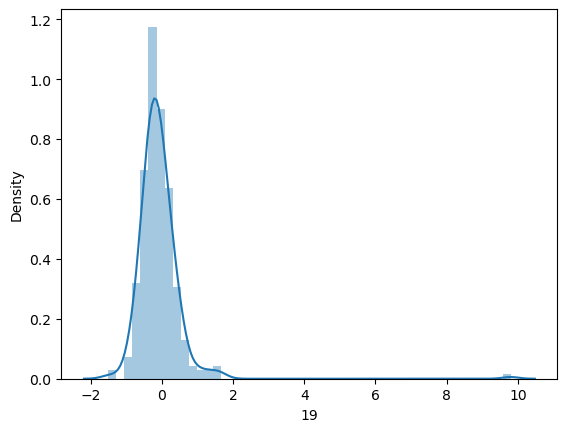

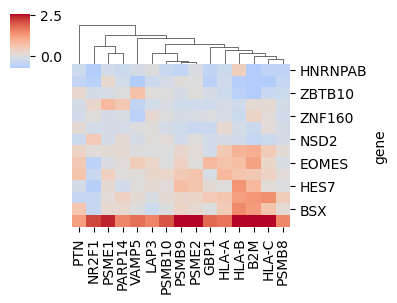

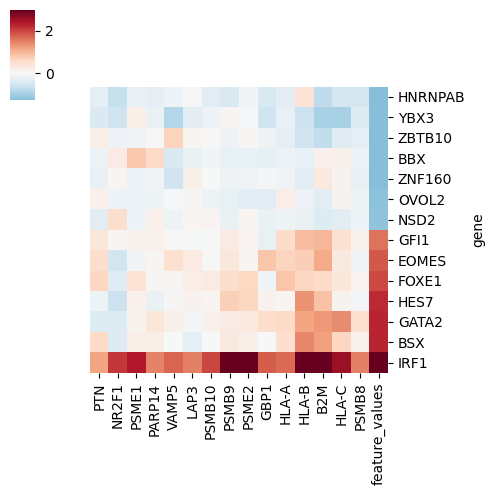

In [36]:
#averaged program scores

gene_expr =gwps_mean_pop.where(cells='masked_active or expanded_masked_active', genes='mean > 0.1', gene_names=True).copy()
gene_expr['gene'] = gene_expr.index.map(lambda x: x.split('_')[0])
gene_expr = gene_expr.groupby('gene').mean()

gene_codes = total_codes.loc[all_clustered]
gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
gene_codes = gene_codes.groupby('gene').mean()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'expression_program_name' is the name of the feature you are interested in
expression_program_name = 19 # Replace with the actual program name
guide_subset = all_clustered
collapse_to_gene = False

# Step 1: Find the genes involved in the program
program_genes = comps.loc[expression_program_name]
program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(15).index.tolist()

# Step 2: Find the outlier columns for that expression program
feature_values = gene_codes[expression_program_name]
outlier_threshold_high = feature_values.quantile(0.98)  # Adjust these thresholds as needed
outlier_threshold_low = feature_values.quantile(0.02)
outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
outlier_perturbations = gene_codes.loc[outlier_perturbations].sort_values(expression_program_name).index

sns.distplot(feature_values)

# Step 3: Extract gene expression data
# Replace 'gwps_mean_pop.where' with the actual method to extract the data from your dataset
expr = gene_expr.loc[outlier_perturbations, program_gene_names]

# Step 4: Produce a clustermap of the gene expression data (without feature_values)
clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False, figsize=[4,3])  # You can adjust the parameters as needed

# Step 5: Get the order of columns after clustering
reordered_column_indices = clustered.dendrogram_col.reordered_ind

# Step 6: Reorder expr dataframe according to the clustering
reordered_expr = expr.iloc[:, reordered_column_indices]

# Step 8: Add the mapped feature_values as the last column in the reordered expr dataframe
reordered_expr['feature_values'] = feature_values.div(feature_values.std())
if collapse_to_gene:
    reordered_expr.index = expr.index.map(lambda x: x.split('_')[0])

# reordered_expr now has the additional column 'feature_values' at the far right, maintaining the clustering order
clustered = sns.clustermap(reordered_expr, cmap='RdBu_r', 
                           center=0, robust=True, row_cluster=False, 
                           col_cluster=False, figsize=[5,5])  # You can adjust the parameters as needed

#plt.savefig('/data/norman/southark/tfs_standardized/figure_exports/20240412_fig4_antigen_presentation_score_heatmap.pdf')

/tmp/ipykernel_86042/2984903315.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_values)
/tmp/ipykernel_86042/2984903315.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())


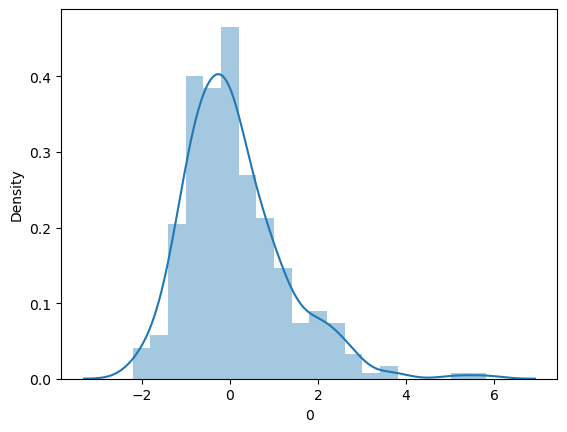

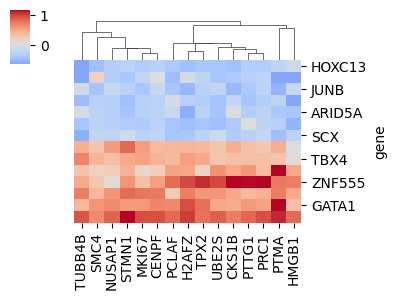

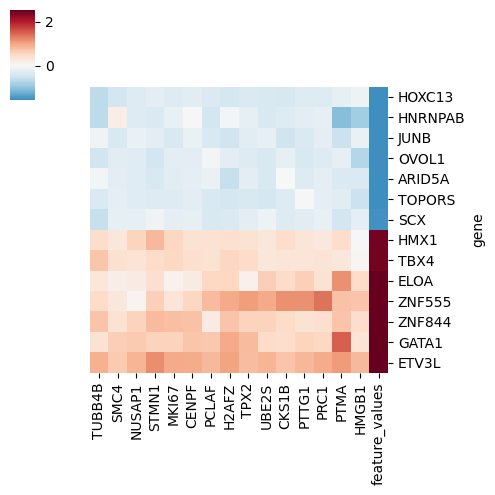

In [37]:
#cell cycle

#averaged program scores

gene_expr =gwps_mean_pop.where(cells='masked_active or expanded_masked_active', genes='mean > 0.1', gene_names=True).copy()
gene_expr['gene'] = gene_expr.index.map(lambda x: x.split('_')[0])
gene_expr = gene_expr.groupby('gene').mean()

gene_codes = total_codes.loc[all_clustered]
gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
gene_codes = gene_codes.groupby('gene').mean()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'expression_program_name' is the name of the feature you are interested in
expression_program_name = 0 # Replace with the actual program name
guide_subset = all_clustered
collapse_to_gene = False

# Step 1: Find the genes involved in the program
program_genes = comps.loc[expression_program_name]
program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(15).index.tolist()

# Step 2: Find the outlier columns for that expression program
feature_values = gene_codes[expression_program_name]
outlier_threshold_high = feature_values.quantile(0.98)  # Adjust these thresholds as needed
outlier_threshold_low = feature_values.quantile(0.02)
outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
outlier_perturbations = gene_codes.loc[outlier_perturbations].sort_values(expression_program_name).index

sns.distplot(feature_values)

# Step 3: Extract gene expression data
# Replace 'gwps_mean_pop.where' with the actual method to extract the data from your dataset
expr = gene_expr.loc[outlier_perturbations, program_gene_names]

# Step 4: Produce a clustermap of the gene expression data (without feature_values)
clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False, figsize=[4,3])  # You can adjust the parameters as needed

# Step 5: Get the order of columns after clustering
reordered_column_indices = clustered.dendrogram_col.reordered_ind

# Step 6: Reorder expr dataframe according to the clustering
reordered_expr = expr.iloc[:, reordered_column_indices]

# Step 8: Add the mapped feature_values as the last column in the reordered expr dataframe
reordered_expr['feature_values'] = feature_values.div(feature_values.std())
if collapse_to_gene:
    reordered_expr.index = expr.index.map(lambda x: x.split('_')[0])

# reordered_expr now has the additional column 'feature_values' at the far right, maintaining the clustering order
clustered = sns.clustermap(reordered_expr, cmap='RdBu_r', 
                           center=0, robust=True, row_cluster=False, 
                           col_cluster=False, figsize=[5,5])  # You can adjust the parameters as needed

#plt.savefig('/data/norman/southark/tfs_standardized/figure_exports/20240418_fig4_cell_cycle_score_heatmap.pdf')

/tmp/ipykernel_86042/1978623047.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature_values)
/tmp/ipykernel_86042/1978623047.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_expr['feature_values'] = feature_values.div(feature_values.std())


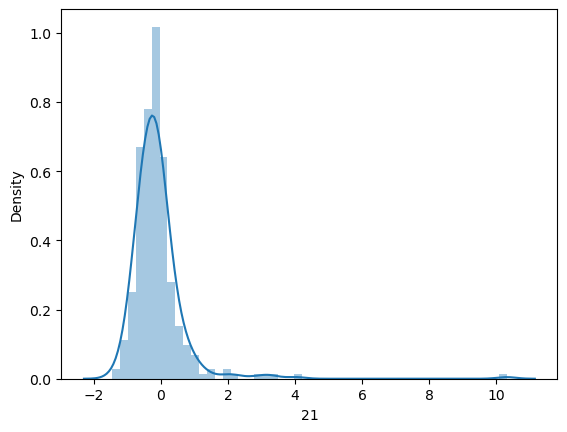

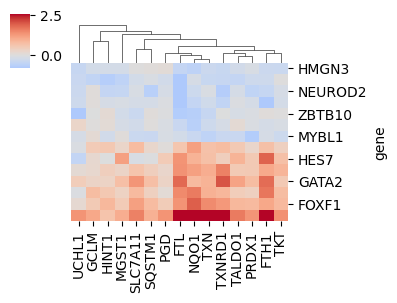

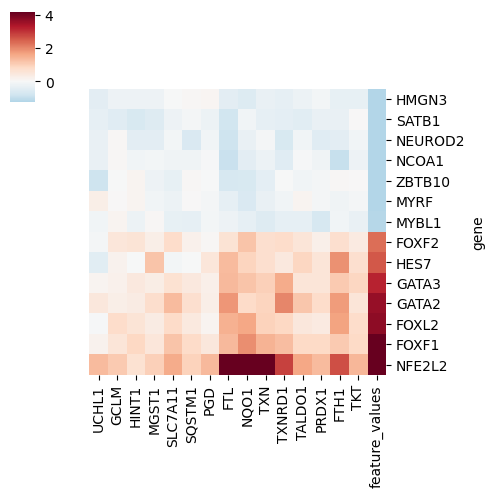

In [38]:
#names[21] = 'Oxidative stress response'


#averaged program scores

gene_expr =gwps_mean_pop.where(cells='masked_active or expanded_masked_active', genes='mean > 0.1', gene_names=True).copy()
gene_expr['gene'] = gene_expr.index.map(lambda x: x.split('_')[0])
gene_expr = gene_expr.groupby('gene').mean()

gene_codes = total_codes.loc[all_clustered]
gene_codes['gene'] = gene_codes.index.map(lambda x: x.split('_')[0])
gene_codes = gene_codes.groupby('gene').mean()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'expression_program_name' is the name of the feature you are interested in
expression_program_name = 21 # Replace with the actual program name
guide_subset = all_clustered
collapse_to_gene = False

# Step 1: Find the genes involved in the program
program_genes = comps.loc[expression_program_name]
program_gene_names = program_genes[program_genes > 0.05].sort_values(ascending=False).head(15).index.tolist()

# Step 2: Find the outlier columns for that expression program
feature_values = gene_codes[expression_program_name]
outlier_threshold_high = feature_values.quantile(0.98)  # Adjust these thresholds as needed
outlier_threshold_low = feature_values.quantile(0.02)
outlier_perturbations = feature_values[(feature_values > outlier_threshold_high) | (feature_values < outlier_threshold_low)].index.tolist()
outlier_perturbations = gene_codes.loc[outlier_perturbations].sort_values(expression_program_name).index

sns.distplot(feature_values)

# Step 3: Extract gene expression data
# Replace 'gwps_mean_pop.where' with the actual method to extract the data from your dataset
expr = gene_expr.loc[outlier_perturbations, program_gene_names]

# Step 4: Produce a clustermap of the gene expression data (without feature_values)
clustered = sns.clustermap(expr, cmap='coolwarm', center=0, method='average', metric='correlation', robust=True, row_cluster=False, figsize=[4,3])  # You can adjust the parameters as needed

# Step 5: Get the order of columns after clustering
reordered_column_indices = clustered.dendrogram_col.reordered_ind

# Step 6: Reorder expr dataframe according to the clustering
reordered_expr = expr.iloc[:, reordered_column_indices]

# Step 8: Add the mapped feature_values as the last column in the reordered expr dataframe
reordered_expr['feature_values'] = feature_values.div(feature_values.std())
if collapse_to_gene:
    reordered_expr.index = expr.index.map(lambda x: x.split('_')[0])

# reordered_expr now has the additional column 'feature_values' at the far right, maintaining the clustering order
clustered = sns.clustermap(reordered_expr, cmap='RdBu_r', 
                           center=0, robust=True, row_cluster=False, 
                           col_cluster=False, figsize=[5,5])  # You can adjust the parameters as needed

#plt.savefig('/data/norman/southark/tfs_standardized/figure_exports/20240418_fig4_oxidative_stress_score_heatmap.pdf')